In [1]:
import pandas as pd
import numpy as np
import torch
from datasets import Dataset

/home/wzarzecki/miniforge3/envs/rf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/home/wzarzecki/ds_10000x/structures_ds_merged"
ds = Dataset.load_from_disk(path)

In [3]:
df= ds.to_pandas()
df.head()

,structure_id,key,timestep,idx,amino_acid_id,latents,secondary_struct,helix,beta
0,design_0,block4_non_pair,49,0,103,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",E,False,True
1,design_0,block4_non_pair,49,1,50,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",H,True,False
2,design_0,block4_non_pair,49,2,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",H,True,False
3,design_0,block4_non_pair,49,3,137,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",H,True,False
4,design_0,block4_non_pair,49,4,122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",E,False,True


In [19]:
latents = np.vstack(df[df["key"] == "block4_non_pair"]["latents"].values)
# latents = df[df["key"] == "block4_non_pair"]
latents.shape

(747945, 4736)

In [37]:
max_val_for_latents = latents.max(axis=0)
means_val_for_latents = latents.mean(axis=0)


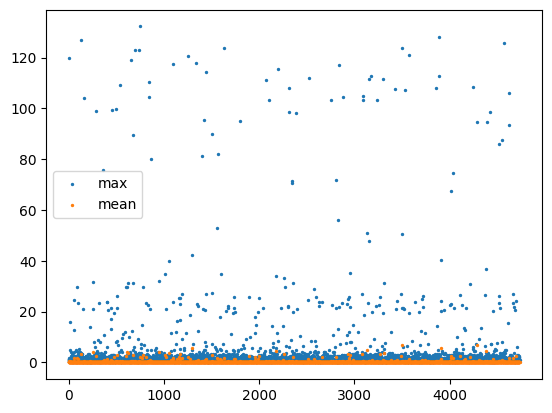

In [39]:
import matplotlib.pyplot as plt

bar_width = 0.01
br1 = np.arange(min_val_for_latents.shape[0])
br2 = [x + bar_width for x in br1]
plt.scatter(br1, max_val_for_latents, label="max", s=2)
plt.scatter(br2, means_val_for_latents, label="mean", s=2)
plt.legend()
plt.show()